                        Case Study: Predictive Analytics in Hotel Booking Management

Objective: 
This case study aims to equip you with practical skills in data science, focusing on predicting customer 
behaviors and booking cancellations in the hotel industry. You will apply EDA, KNN, Decision Tree 
algorithms, and learn to handle class imbalances using SMOTE.

Dataset overview: 

The dataset has several feature(independant variables) such as: 

Booking_ID: unique identifier of each booking
no_of_adults: Number of adults
no_of_children: Number of Children
no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or 
booked to stay at the hotel
no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to 
stay at the hotel
type_of_meal_plan: Type of meal plan booked by the customer:
required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
room_type_reserved: Type of room reserved by the customer. The values are ciphered 
(encoded) by INN Hotels.
lead_time: Number of days between the date of booking and the arrival date
arrival_year: Year of arrival date
arrival_month: Month of arrival date
arrival_date: Date of the month
market_segment_type: Market segment designation.
repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
no_of_previous_cancellations: Number of previous bookings that were canceled by the 
customer prior to the current booking
no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the 
customer prior to the current booking
avg_price_per_room: Average price per day of the reservation; prices of the rooms are 
dynamic. (in euros)
no_of_special_requests: Total number of special requests made by the customer (e.g. high 
floor, view from the room, etc)
booking_status: Flag indicating if the booking was canceled or not.

Importing libraries 

In [71]:
import pandas as pd 
import numpy as np 
from ydata_profiling import ProfileReport
from sklearn.preprocessing import  LabelEncoder
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split



Loading Dataset

In [42]:
#keeping original data for eda answers 
hotel_data_for_eda= pd.read_csv(r"C:\Users\HP.Com\Desktop\HAMZA\atomcamp_work_hamza\ML_module\session4\Hotel Reservations.csv")
hotel_data_for_eda.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [33]:
hotel_data= pd.read_csv(r"C:\Users\HP.Com\Desktop\HAMZA\atomcamp_work_hamza\ML_module\session4\Hotel Reservations.csv")
hotel_data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [34]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
profile = ProfileReport(hotel_data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Preprocessing:

##### Handle missing or anomalous data.

##### Convert categorical variables into numerical formats using encoding techniques (e.g., one-hot encoding, label encoding).

1) type_of_meal_plan  -- one hot encoding
2) room_type_reserved -- one hot encoding
3) market_segment_type -- one hot encoding
4) booking_status -- Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

# Preparing the encoders
label_encoder = LabelEncoder()

# List of columns to be encoded
columns_to_encode = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

# Applying label encoding to each binary column using apply
hotel_data[columns_to_encode] = hotel_data[columns_to_encode].apply(label_encoder.fit_transform)




In [36]:
hotel_data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  2                  0                           0   
1                  3                  3                           0   
2                  1                  0                           0   
3                  2                  0                           0   
4                  1                  3                           0   

   room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0                   0        224          2017             10             2   
1                   0          5          2018             11             6   
2                   0          1          2018              2            28   
3                   0        211          2018              5            20   
4                   0         48          2018              4            11   

   market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                    3               0                             0   
1                    4               0                             0   
2                    4               0                             0   
3                    4               0                             0   
4                    4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               1  
1                       1               1  
2                       0               0  
3                       0               0  
4                       0               0

Dropping the Booking_ID from the table, as its not playing any significance 

In [37]:
hotel_data_mod=hotel_data.drop('Booking_ID', axis=1)


In [38]:
hotel_data_mod.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  3                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  3                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        224          2017             10             2                    3   
1          5          2018             11             6                    4   
2          1          2018              2            28                    4   
3        211          2018              5            20                    4   
4         48          2018              4            11                    4   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               1  
1                       1               1  
2                       0               0  
3                       0               0  
4                       0               0

In our final "data", we dont need to do any normalization or standardization, nor there is a need to remove duplicates, nor were there any null values. Our pre-processing step only contained converting the categorical data 

## Exploratory Data Analysis 

#### Investigate relationships between features and the target variable (charges).



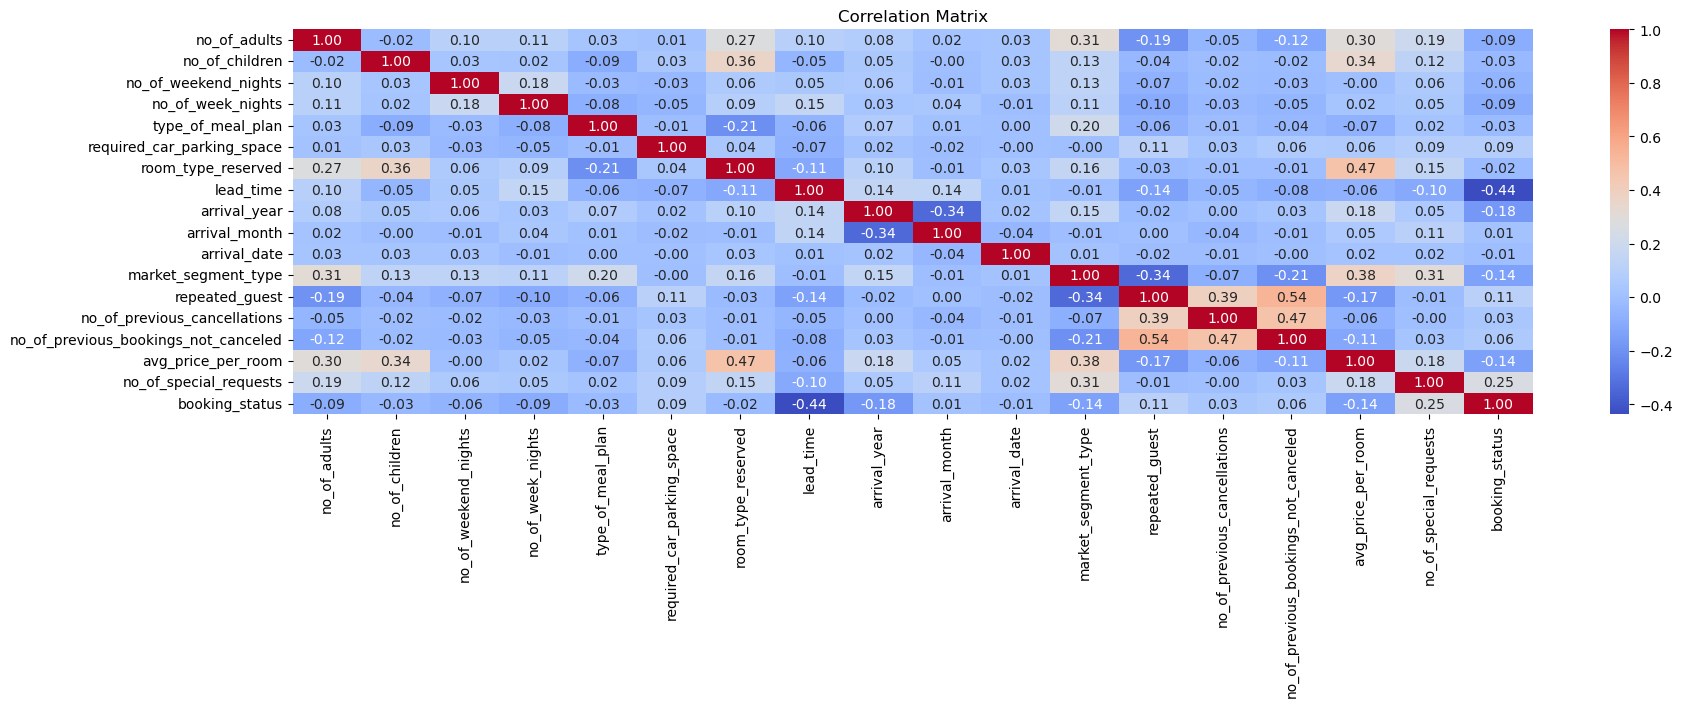

In [21]:
# Correlation matrix
correlation_matrix = hotel_data_mod.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Using hotel_data for EDA 

1) Number of unique meal plan hotel is offering

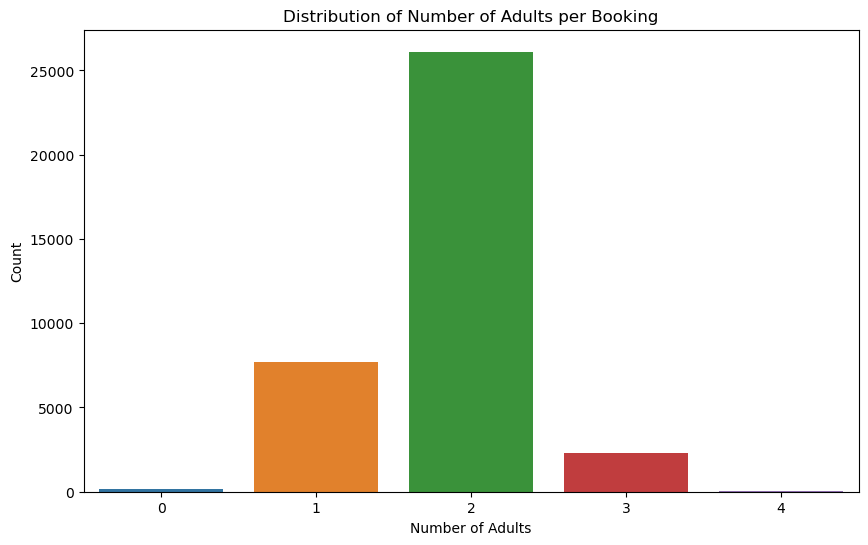

In [43]:
# Answering Question 1: Distribution of the number of adults per booking
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_adults', data=hotel_data)
plt.title('Distribution of Number of Adults per Booking')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.show()



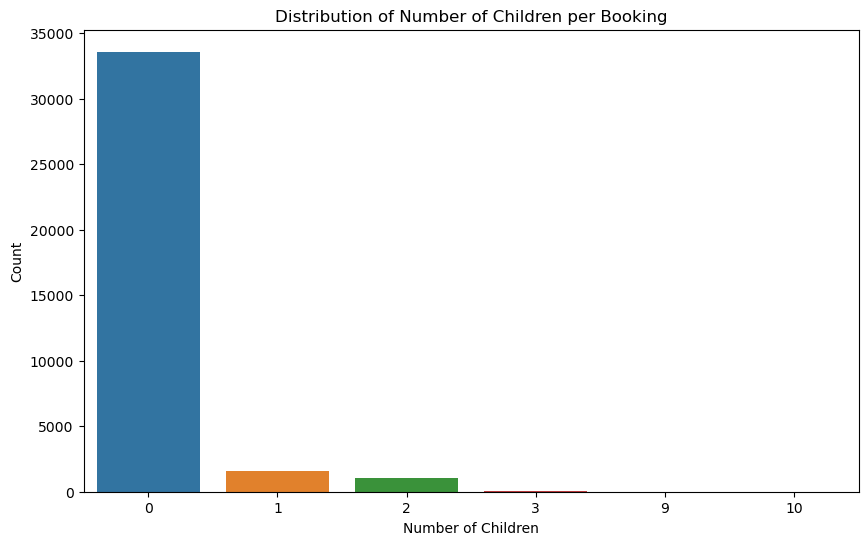

In [44]:
# Answering Question 2: Distribution of the number of children per booking
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_children', data=hotel_data)
plt.title('Distribution of Number of Children per Booking')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

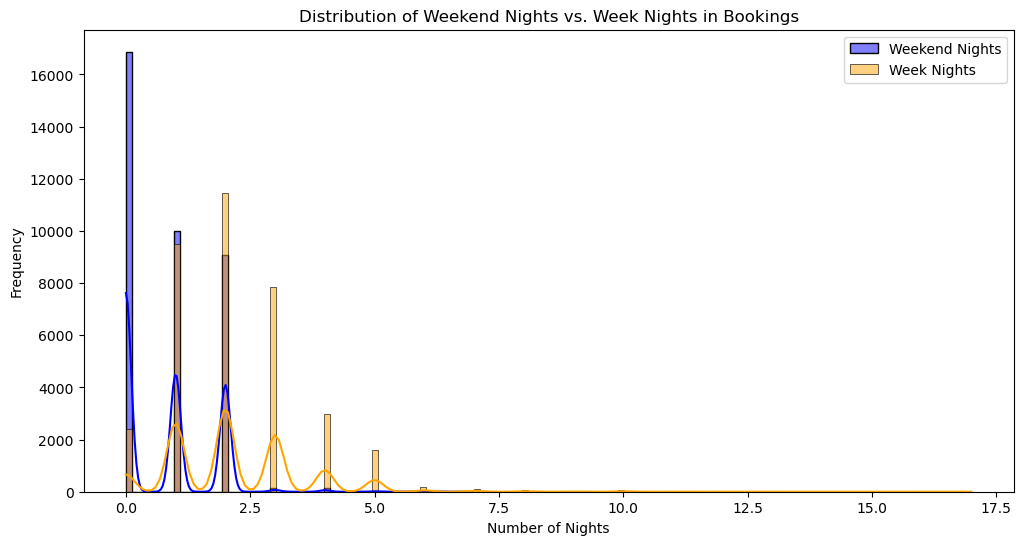

In [46]:
# Distribution of weekend nights vs. week nights in bookings
plt.figure(figsize=(12, 6))
sns.histplot(hotel_data, x='no_of_weekend_nights', color='blue', label='Weekend Nights', kde=True)
sns.histplot(hotel_data, x='no_of_week_nights', color='orange', label='Week Nights', kde=True)
plt.title('Distribution of Weekend Nights vs. Week Nights in Bookings')
plt.xlabel('Number of Nights')
plt.ylabel('Frequency')
plt.legend()
plt.show()


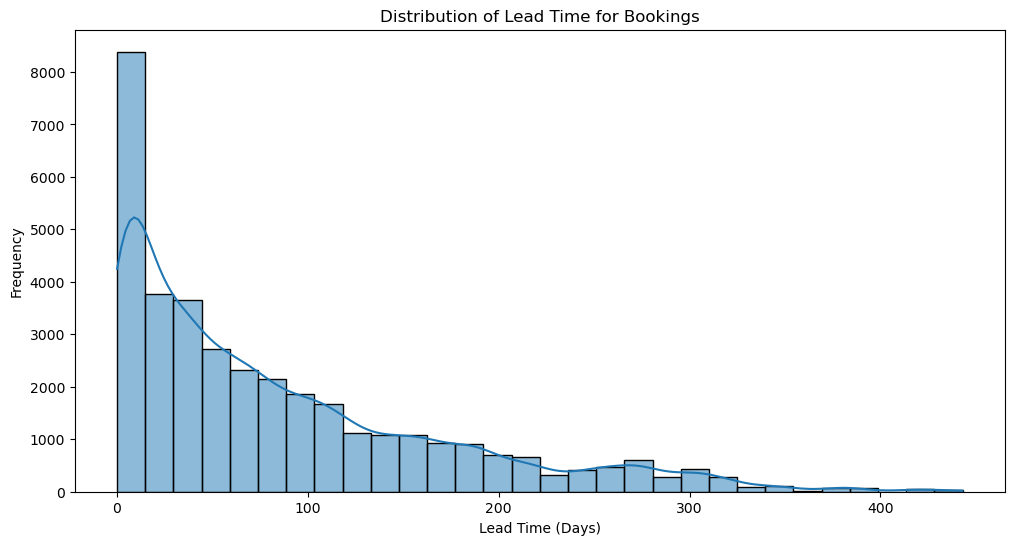

In [47]:
# Distribution of lead time for bookings
plt.figure(figsize=(12, 6))
sns.histplot(hotel_data['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time for Bookings')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()


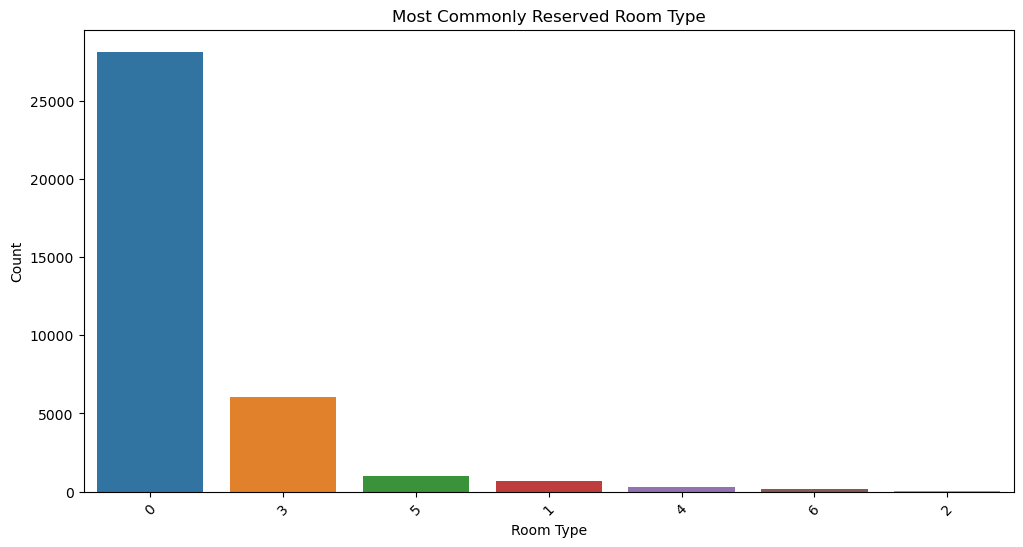

In [49]:
# Most commonly reserved room type
plt.figure(figsize=(12, 6))
sns.countplot(x='room_type_reserved', data=hotel_data, order=hotel_data['room_type_reserved'].value_counts().index)
plt.title('Most Commonly Reserved Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Model Development



1. define dependent and independdent variables (in simple define x and y)
2. split it into train and test
3. Model train on the trainging data
4. test the model on testing data
5. evaluate


In [53]:
# Preparing the data for the model(Data which will be used it hotel_data_mod)

X = hotel_data_mod.drop('booking_status', axis=1)  # Features
y = hotel_data_mod['booking_status']               # Target variable


In [54]:
X.head(2)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  3                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        224          2017             10             2                    3   
1          5          2018             11             6                    4   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   

   no_of_special_requests  
0                       0  
1                       1

In [56]:
y.head(2)

0    1
1    1
Name: booking_status, dtype: int32

#### Split the dataset into training and testing sets.


    training data: 80%
    testing data: 20%

In [57]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Working with Desicion Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

# Creating and training the Decision Tree model
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [68]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [69]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

(0.8709855272226051, 0.8734665747760165)

The Decision Tree models have been successfully applied to your dataset using both Gini impurity and Information Gain (Entropy) as criteria. Here are the results:

1. Decision Tree with Gini Impurity Criterion:  
Accuracy on the test set: Approximately 87%

2. Decision Tree with Information Gain (Entropy) Criterion:  
Accuracy on the test set: Approximately 87.73%



In [72]:
# Assuming y_test, y_pred_gini, and y_pred_entropy are already defined from your model predictions

# Evaluation metrics for Gini model
confusion_gini = confusion_matrix(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini)
recall_gini = recall_score(y_test, y_pred_gini)
f1_score_gini = f1_score(y_test, y_pred_gini)
roc_auc_gini = roc_auc_score(y_test, y_pred_gini)

# Evaluation metrics for Entropy model
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_score_entropy = f1_score(y_test, y_pred_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_pred_entropy)

# Printing the evaluation metrics
print("Gini Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_gini)
print("Precision: {:.2f}".format(precision_gini))
print("Recall: {:.2f}".format(recall_gini))
print("F1 Score: {:.2f}".format(f1_score_gini))
print("ROC AUC: {:.2f}".format(roc_auc_gini))

print("\nEntropy Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_entropy)
print("Precision: {:.2f}".format(precision_entropy))
print("Recall: {:.2f}".format(recall_entropy))
print("F1 Score: {:.2f}".format(f1_score_entropy))
print("ROC AUC: {:.2f}".format(roc_auc_entropy))



Gini Model Evaluation Metrics:
Confusion Matrix:
 [[1970  446]
 [ 490 4349]]
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
ROC AUC: 0.86

Entropy Model Evaluation Metrics:
Confusion Matrix:
 [[1967  449]
 [ 469 4370]]
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
ROC AUC: 0.86


## Working with KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creating and training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [66]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(5, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(5, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)


Euclidean Accuracy: 0.8497587870434183
Euclidean Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77      2416
           1       0.88      0.90      0.89      4839

    accuracy                           0.85      7255
   macro avg       0.83      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255

Manhattan Accuracy: 0.8559614059269469
Manhattan Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78      2416
           1       0.88      0.91      0.89      4839

    accuracy                           0.86      7255
   macro avg       0.84      0.83      0.84      7255
weighted avg       0.85      0.86      0.85      7255



# Interpretation:

Euclidean ( 85%) and Manhattan Accuracy ( 86%):  
The accuracy indicates that around 85 % and 86 % of the predictions made by both models (using Euclidean and Manhattan distances) are correct. This is a good accuracy rate for a binary classification problem.

Precision:  
Class 0 (Booking_not_cancelled): Precision is 0.79, meaning that when the model predicts 'Booking_not_cancelled', it is correct 79% of the time.  
Class 1 (Booking_cancelled): Precision is 0.85, indicating that when the model predicts 'Booking_cancelled', it is correct 85% of the time.  

Recall:  
Class 0: Recall is 0.74, signifying that the model correctly identifies 74% of all actual 'Booking_not_cancelled' cases.  
Class 1: Recall is 0.90, meaning the model correctly identifies 90% of all actual 'Booking_cancelled' cases.  

F1-Score:  
The F1-score combines precision and recall into a single metric, balancing the trade-off between them. It is particularly useful when the class distribution is imbalanced.  
Class 0: F1-score is 0.77, indicating a good balance between precision and recall.  
Class 1: F1-score is 0.89, suggesting a slightly better balance for 'Booking_cancelled' predictions.